<a href="https://colab.research.google.com/github/shetehm/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Individual_Colab_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Contributor: Harshavardhan M. Shete**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
#netflix_df will be used for EDA
netflix_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering- Harshavardhan Shete/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding='unicode_escape')
#cluster_df will be used for clustering
cluster_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering- Harshavardhan Shete/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding='unicode_escape')

## **Exploratory Data Analysis**

In [ ]:
netflix_df.shape

(7787, 12)

In [ ]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1414,Movie,Nightflyers,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
#Checking for duplicate records
len(netflix_df[netflix_df.duplicated()])

0

All records are unique, there are no duplicate records.

## **Handling Missing Values**

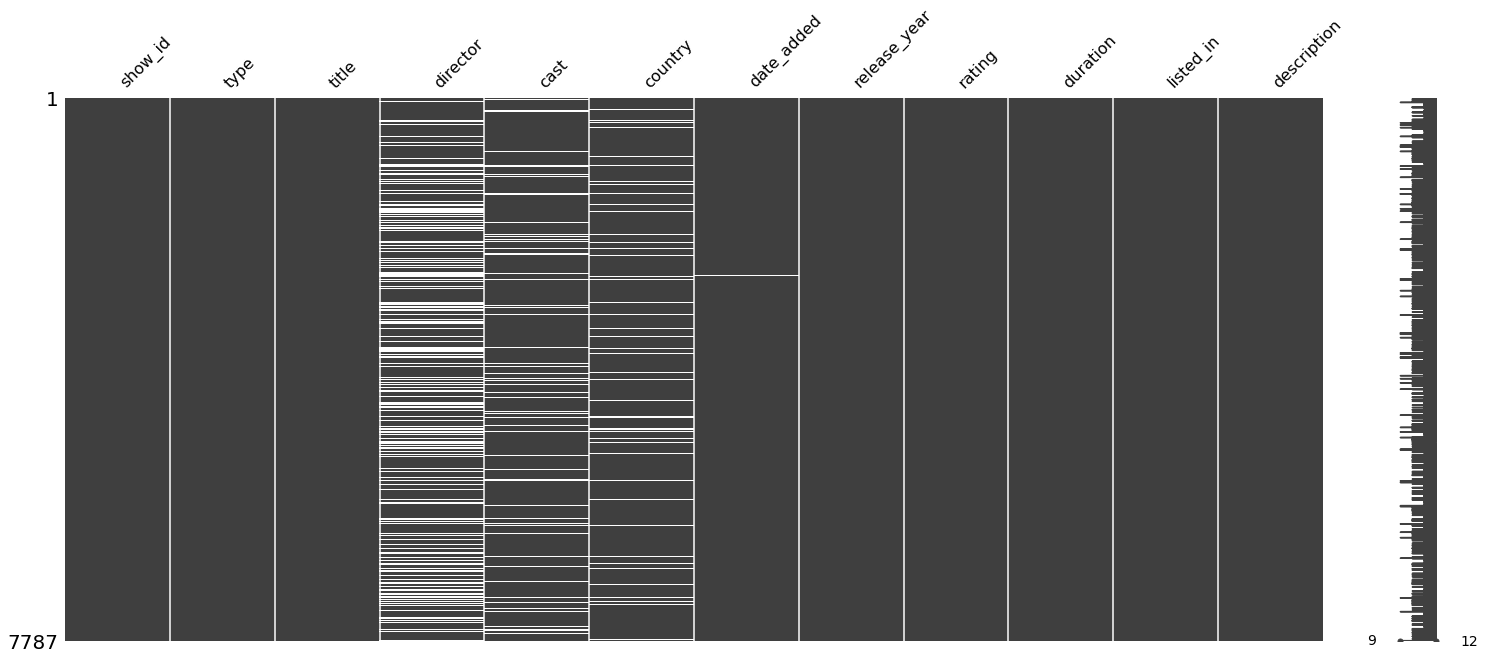

In [ ]:
# heat matrix for missing values
import missingno as msno
fig = msno.matrix(netflix_df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

Horizontal lines in the bar of respective variable shows the presence of missing values. Director, Cast, Country and Date Added columns have presence of missing values.

In [ ]:
#Calculating the percentage of NULL of values in each column
total = netflix_df.isnull().sum().sort_values(ascending=False)
percent = (netflix_df.isnull().sum()/netflix_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
rating,7,0.089893
description,0,0.000000
listed_in,0,0.000000
duration,0,0.000000
release_year,0,0.000000
title,0,0.000000


Director column has 30.6% missing values, we cannot miss on all these records. Cast and country column also has significant number of missing values whereas the date_added and rating column has negligible number of miising values.

In [ ]:
#Replaing missing values in 'director' column with value 'unknown'
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

#Replaing missing values in 'cast' column with value 'unknown'
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replaing missing values in 'country' column with mode
netflix_df['country']= netflix_df['country'].fillna(netflix_df['country'].mode()[0])


#Replaing missing values in 'rating' column with value most frequent rating i.e. mode
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

There is no logical way to handle null values in 'date' column and the null values are very negligible, thus dropping them.

In [ ]:
# Dropping the null values
netflix_df.dropna(inplace=True)

In [ ]:
#Calculating the percentage of NULL of values in each column after handling null values
total = netflix_df.isnull().sum().sort_values(ascending=False)
percent = (netflix_df.isnull().sum()/netflix_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
description,0,0.0
listed_in,0,0.0
duration,0,0.0
rating,0,0.0
release_year,0,0.0
date_added,0,0.0
country,0,0.0
cast,0,0.0
director,0,0.0
title,0,0.0


In [ ]:
netflix_df.shape

(7777, 12)

After handling missing values, there are 7777 rows available in the dataset

# **Exploratory Data Analysis**

In [ ]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [ ]:
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

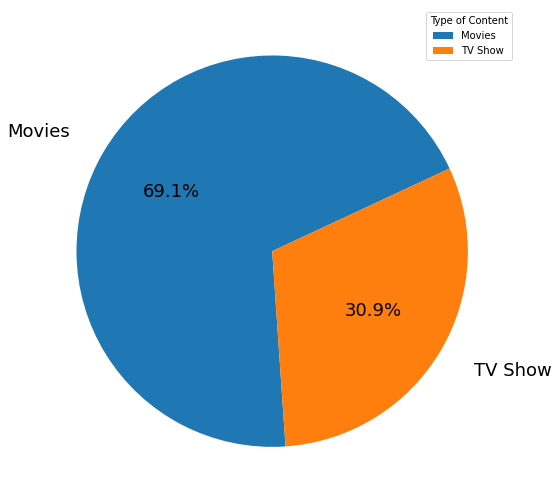

In [ ]:
#Visualization: Type of Content
my_labels = ['Movies','TV Show']
my_explode = [0.2,0]
my_colors = ['green','red']
sizes = netflix_df['type'].value_counts()
fig = plt.figure(1, figsize=(9,9))
plt.pie(sizes,labels = my_labels, labeldistance = 1.2,autopct='%1.1f%%', startangle = 25, textprops={'fontsize': 18} )
plt.legend(title = 'Type of Content')
plt.show()

In [ ]:
netflix_df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'unknown', 'Norway, Iceland, United States', 'United Kingdom',
       'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
       'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada

There are multiple valued in the country coluns for each record. Considering the first value in the list as a country of origin.

In [ ]:
#FEATURE ENGINEERING #Creating a new feature 'origin_Country'
netflix_df['origin_Country']= netflix_df['country'].apply(lambda x: x.split(",")[0])

In [ ]:
netflix_df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,origin_Country
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States
5,s6,TV Show,46,Serdar Akar,"Erdal BeÅikÃ§ioÄlu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Turkey
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",Egypt
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,United States
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",India
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,India


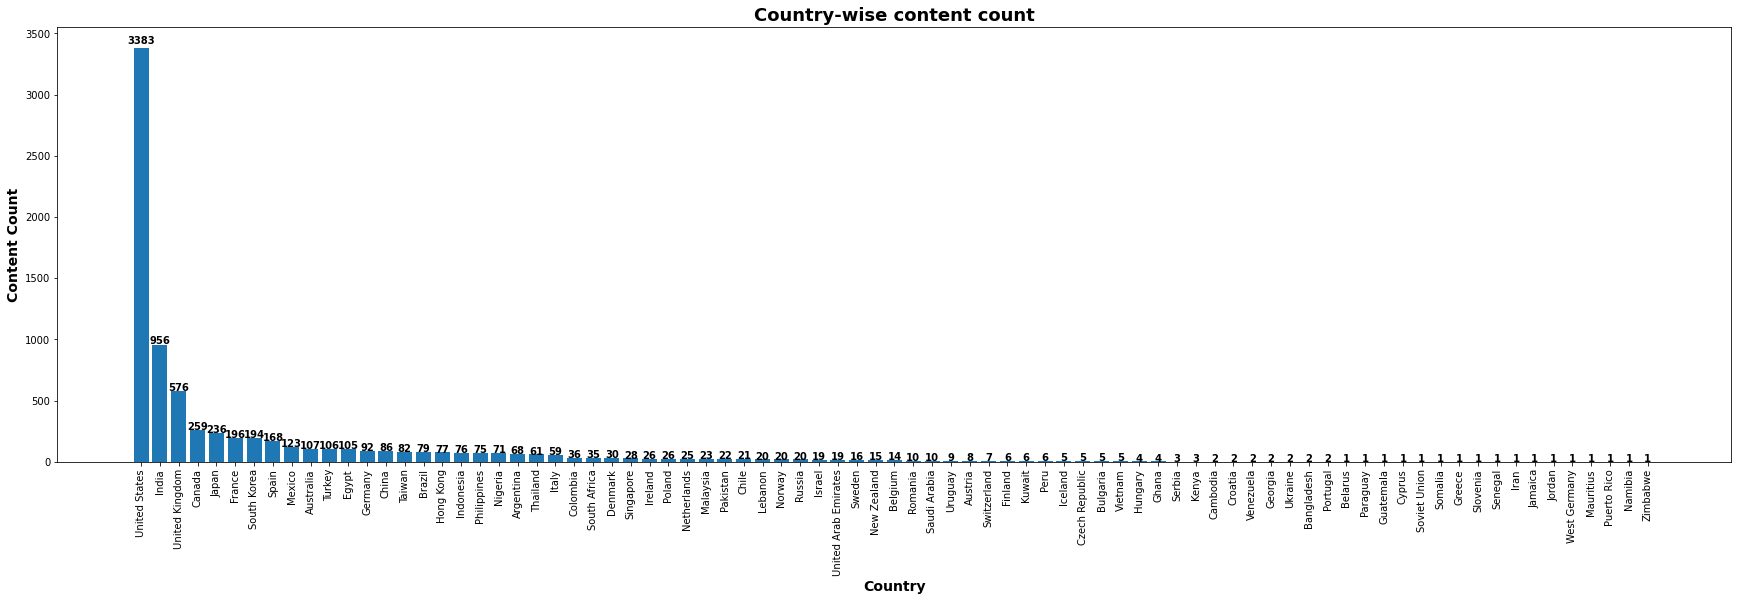

In [ ]:
#Visualization: Country-wise content count
data= netflix_df.groupby('origin_Country')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(30,8))
graph = plt.bar(data['origin_Country'], data['show_id'])

plt.title('Country-wise content count', weight='bold', fontsize= 18)
plt.xlabel('Country', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['origin_Country'], rotation= 90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

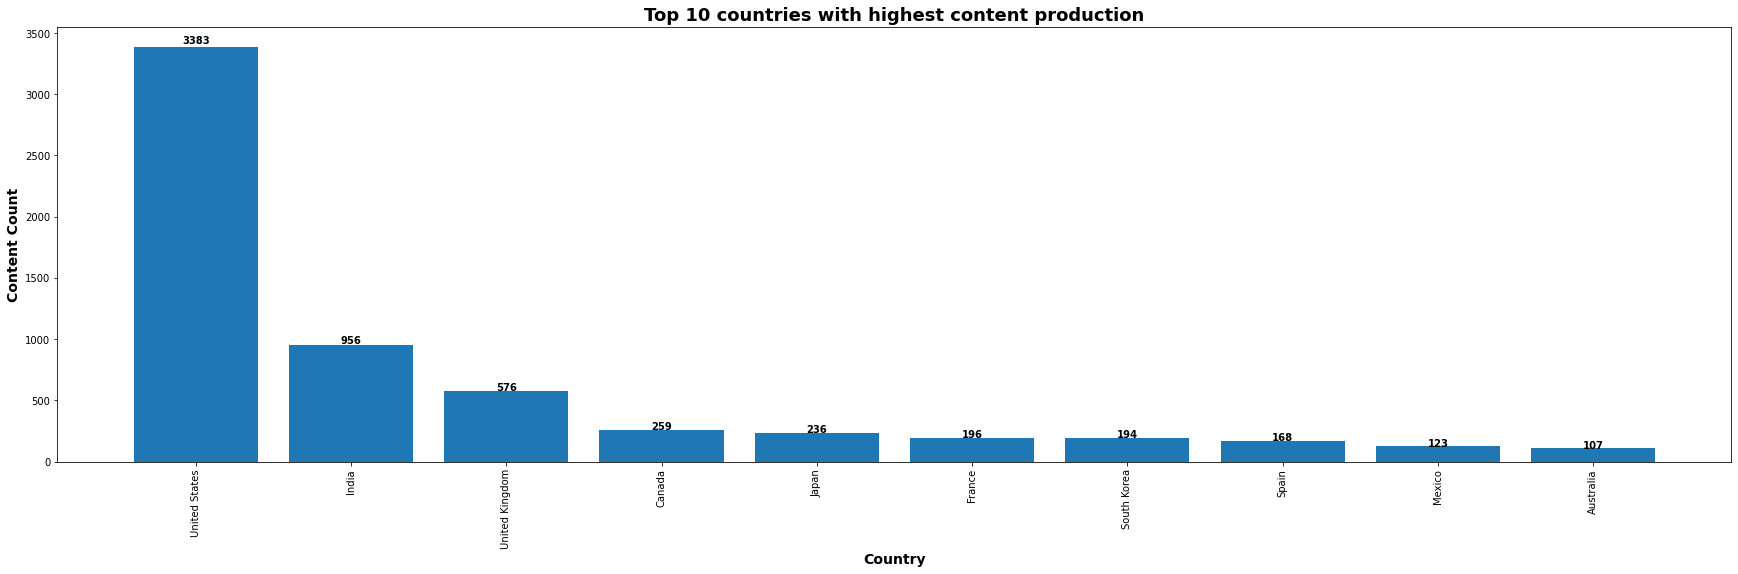

In [ ]:
#Visualization: Top 10 countries with highest content production
data= netflix_df.groupby('origin_Country')['show_id'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(30,8))
graph = plt.bar(data['origin_Country'], data['show_id'])

plt.title('Top 10 countries with highest content production', weight='bold', fontsize= 18)
plt.xlabel('Country', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['origin_Country'], rotation= 90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

United States tops the list with the largest content creator with 3383 movies and TV shows in total, floowed by India and United Kingdom.

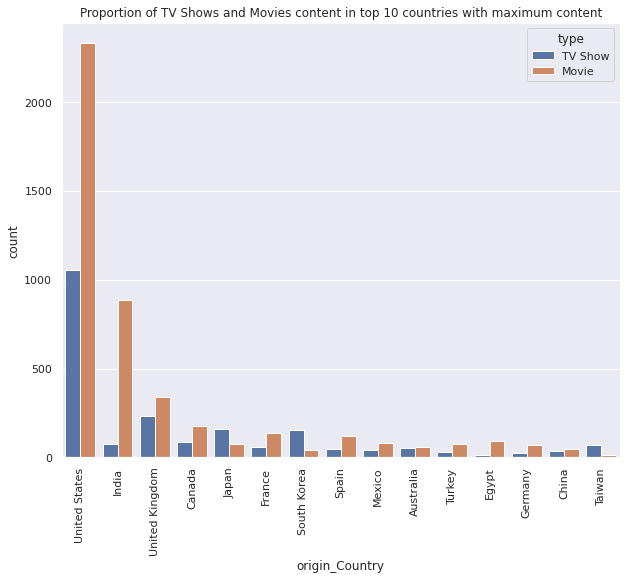

In [ ]:
#Proportion of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="origin_Country",data= netflix_df,hue= "type",order = netflix_df['origin_Country'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("Proportion of TV Shows and Movies content in top 10 countries with maximum content")
plt.show()


It is evident that most of the countries have higher number of movie content that TV shows with exceptions of Japan, South Korea and Taiwan.

In [ ]:
netflix_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## **Description of Content Ratings**

**TV Content Ratings**
1. TV-Y: Appropriate for all children
2. TV-Y7: For children aged 7 and above
3. TV-Y7-FV: For children aged 7 and above, program has more intense fantasy violence
4. TV-G: General Audiance
5. TV-PG: Parental Guidance Suggested
6. TV-14: Content might be unsuitable for children under 14 years age
7. TV-MA: Mature audiance only (above 17 years of age)

**Movie Ratings**

1. G: Genaral Audiance
2. PG: Parental Guidance, some content may not be suitable for children
3. PG-13: Some material may be inappropriate for children under 13
4. R: Under 17 accompanying with parent/guardian will be allowed
5. NC-17: No one 17 and under admitted
6. NR/UR: Not rated or unrated

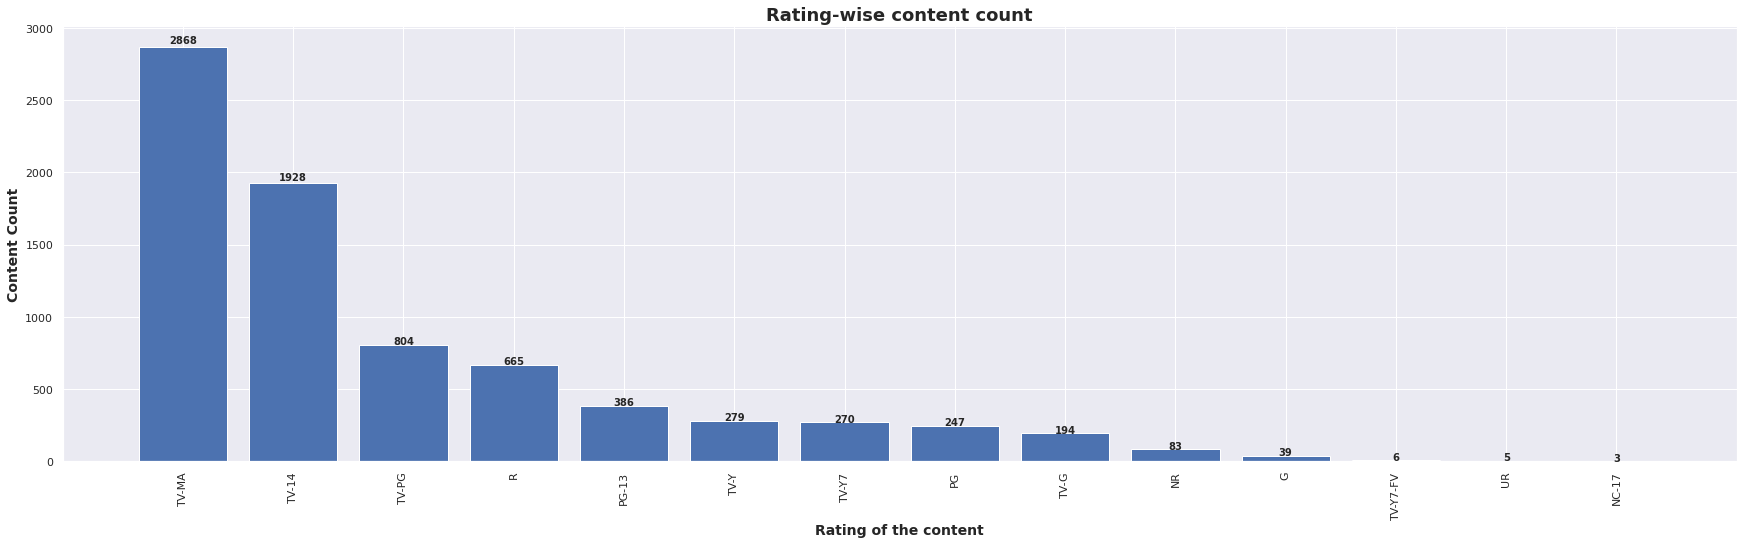

In [ ]:
#Visualization: Rating-wise content count
data= netflix_df.groupby('rating')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(30,8))
graph = plt.bar(data['rating'], data['show_id'])

plt.title('Rating-wise content count', weight='bold', fontsize= 18)
plt.xlabel('Rating of the content', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['rating'], rotation= 90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

The highest amount of content (2868) belongs to TV-MA rating i.e. mature audience only, followed by TV-14, TV-PG. Top three content ratings with highest amount of content is TV rating category. This also shows that content appropriate for children is very less as compared to adult content.

Crating a new feature called 'appropriate_For', this will serve as a combined rating for both TV shows and movies.

In [ ]:
#Function to populate values for 'appropriate_For' feature
def APPROPRIATE_FOR_WHOM (rating):
  appropriate_For = ''
  if (rating== 'TV-MA' or rating== 'NR' or rating=='NC-17' or rating=='UR'):
    appropriate_For= 'Adults Only'
  elif (rating== 'R' or rating== 'PG-13' or rating== 'TV-14'):
    appropriate_For= 'Teenage'
  elif (rating=='TV-Y7' or rating=='TV-Y7-FV' or rating== 'PG' or rating== 'TV-PG'):
    appropriate_For= 'Kid_7_to_13'
  else:
    appropriate_For= 'Kids'

  return appropriate_For

In [ ]:
#FEATURE ENGINEERING #Creating new column 'appropriate_For'
netflix_df['appropriate_For'] = netflix_df.apply(lambda x: APPROPRIATE_FOR_WHOM(x['rating']), axis=1)

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,origin_Country,appropriate_For
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,Adults Only
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,Adults Only
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,Teenage
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,Teenage
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,Teenage


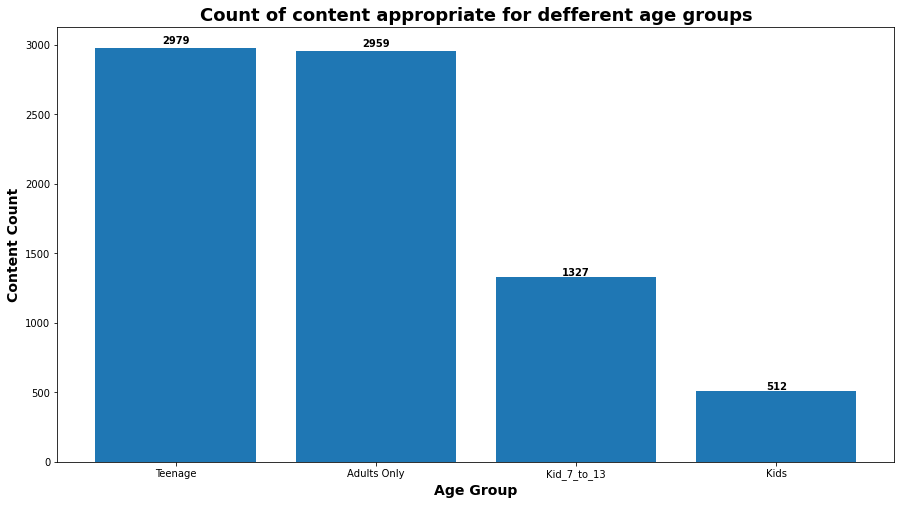

In [ ]:
#Count of content appropriate for defferent age groups
data= netflix_df.groupby('appropriate_For')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,8))
graph = plt.bar(data['appropriate_For'], data['show_id'])

plt.title('Count of content appropriate for defferent age groups', weight='bold', fontsize= 18)
plt.xlabel('Age Group', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['appropriate_For'])
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

Teenage and Adult content have almost equal volume, whereas the kids content is very less.

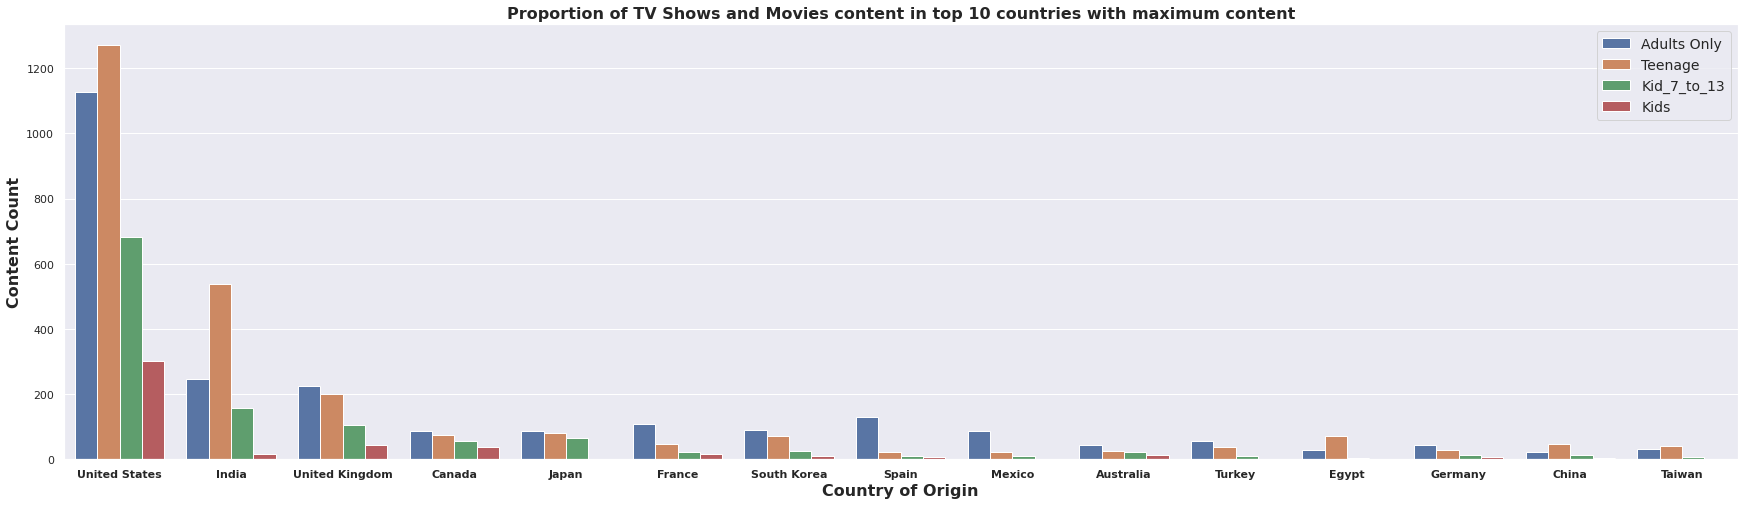

In [ ]:
#Proportion of age-wise content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(30,8))
ax=sns.countplot(x="origin_Country",data= netflix_df,hue= "appropriate_For",order = netflix_df['origin_Country'].value_counts().index[0:15])
plt.xticks(weight='bold')
plt.xlabel('Country of Origin', weight='bold', fontsize=16)
plt.ylabel('Content Count', weight='bold', fontsize=16)
plt.title("Proportion of TV Shows and Movies content in top 10 countries with maximum content", weight='bold', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.show()


Except United States and India almost all other countries have higher volume of adult content and except United States all other countries have negligible amount of child content.

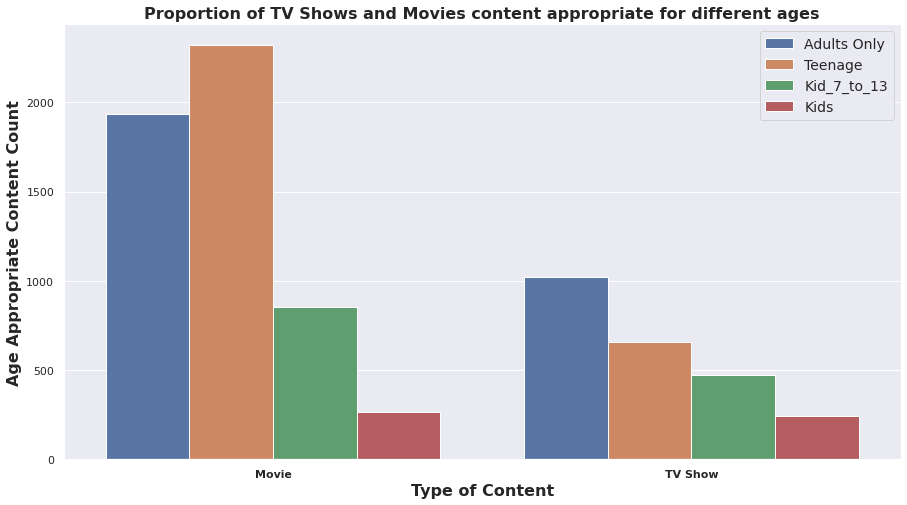

In [ ]:
#Proportion of TV Shows and Movies content appropriate for different ages
sns.set()
plt.figure(figsize=(15,8))
ax=sns.countplot(x="type",data= netflix_df,hue= "appropriate_For",order = netflix_df['type'].value_counts().index[0:15])
plt.xticks(weight='bold')
plt.xlabel('Type of Content', weight='bold', fontsize=16)
plt.ylabel('Age Appropriate Content Count', weight='bold', fontsize=16)
plt.title("Proportion of TV Shows and Movies content appropriate for different ages", weight='bold', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.show()


There is highest volume of content appropriate for Teens in movies, whereas there is highest volume of adult content in TV shows.

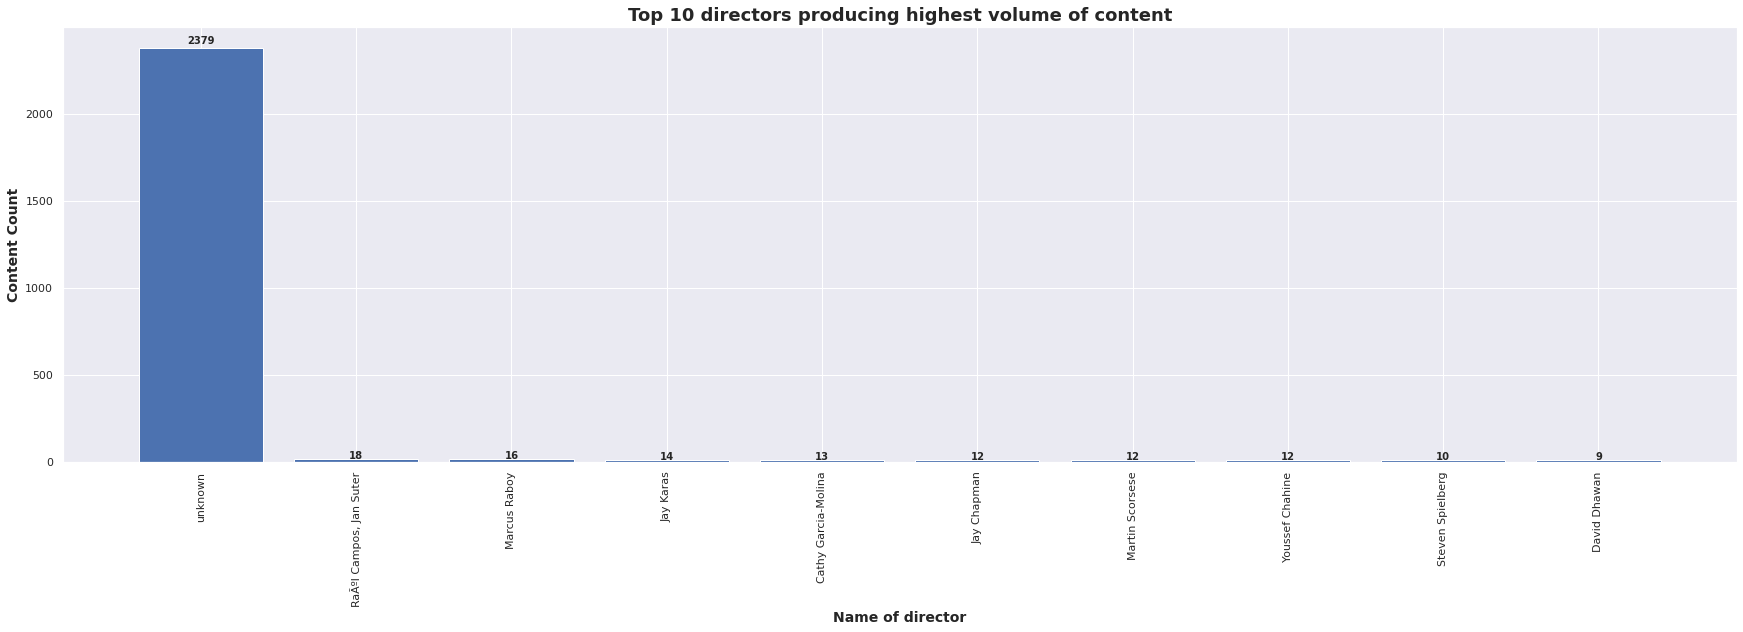

In [ ]:
#Visualization: Top 10 directors producing highest volume of content
data= netflix_df.groupby('director')['show_id'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(30,8))
graph = plt.bar(data['director'], data['show_id'])

plt.title('Top 10 directors producing highest volume of content', weight='bold', fontsize= 18)
plt.xlabel('Name of director', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['director'], rotation= 90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

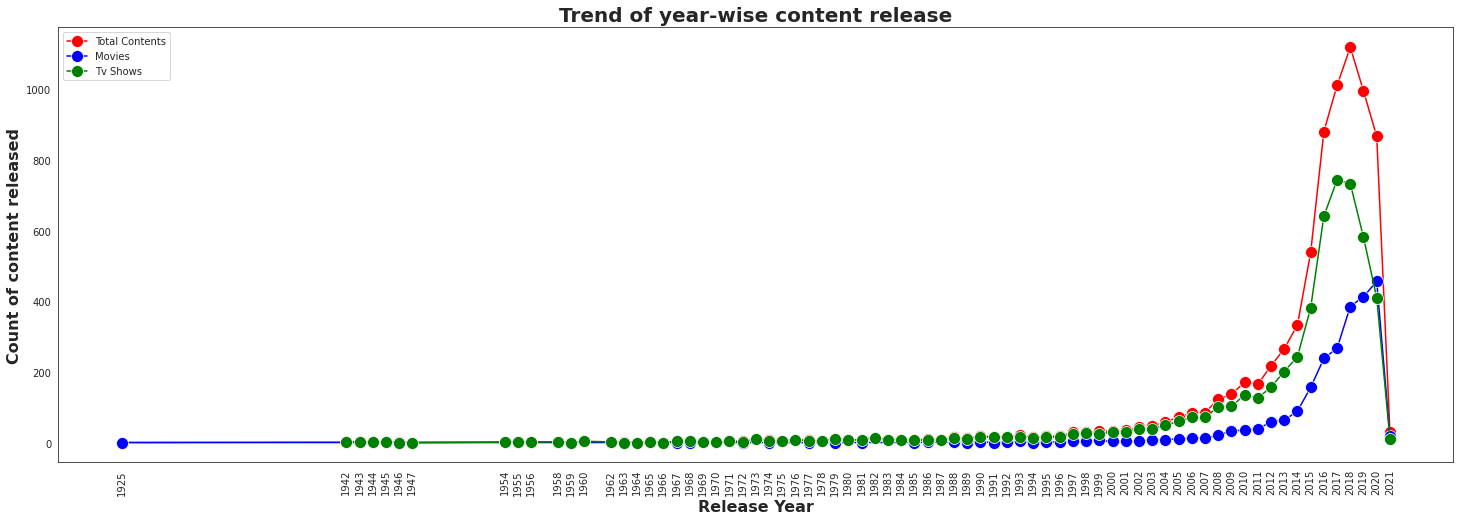

In [ ]:
#Trend of year-wise content release
sns.set_style("white")
#sns.set()
plt.figure(figsize=(25,8))
data1 = netflix_df.groupby(['release_year'])['show_id'].count().reset_index(name='total_count')
data2= netflix_df[netflix_df['type']=='TV Show']
data2= data2.groupby('release_year')['show_id'].count().reset_index(name='TV_count')
data3= netflix_df[netflix_df['type']=='Movie']
data3= data3.groupby('release_year')['show_id'].count().reset_index(name='Movie_count')
 
plot1= sns.lineplot(x=data1['release_year'],y=data1['total_count'],data=data1, color= 'Red', marker= 'o', markersize= 12)
plot2= sns.lineplot(x=data2['release_year'], y=data2['TV_count'], data=data2, color= 'Blue', marker= 'o', markersize= 12)
plot3= sns.lineplot(x=data3['release_year'], y=data3['Movie_count'], data=data3, color= 'Green', marker= 'o', markersize= 12)

plt.xlabel('Release Year', weight='bold', fontsize=16)
plt.ylabel('Count of content released', weight='bold', fontsize=16)
plt.title("Trend of year-wise content release", weight='bold', fontsize=20)
plt.xticks(data1['release_year'].unique())
plt.xticks(rotation='vertical')
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.show()

The content volume was stagnant till 2008-09 and then it has shown exponential growth. The volume again comes significantly down in 2021, this might be because Covid impact throughout the world.

After having a look of relase trend, it will be interesting to see what is trend of content being added on Netflix.

In [ ]:
#FEATURE ENGINEERING #Extracting Year and Month from date_added column
import datetime as dt
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

# Year_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

#Adding month column from 'date_added'
netflix_df['month_added']=netflix_df['date_added'].dt.month

In [ ]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,origin_Country,appropriate_For,year_added,month_added
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,Adults Only,2020,8


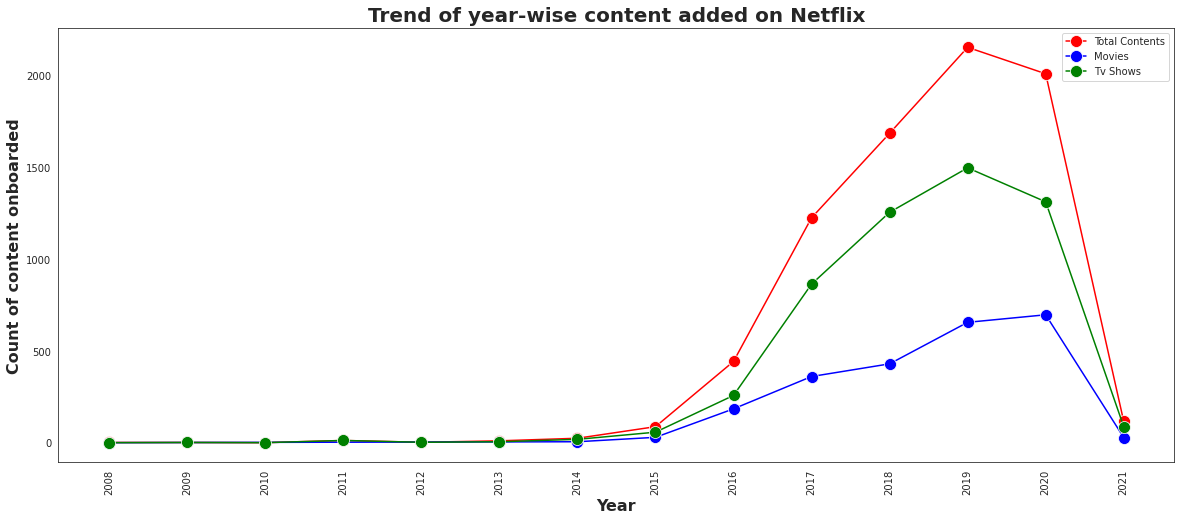

In [ ]:
#Trend of year-wise content added on Netflix
sns.set_style("white")
#sns.set()
plt.figure(figsize=(20,8))
data1 = netflix_df.groupby(['year_added'])['show_id'].count().reset_index(name='total_count')
data2= netflix_df[netflix_df['type']=='TV Show']
data2= data2.groupby('year_added')['show_id'].count().reset_index(name='TV_count')
data3= netflix_df[netflix_df['type']=='Movie']
data3= data3.groupby('year_added')['show_id'].count().reset_index(name='Movie_count')
 
plot1= sns.lineplot(x=data1['year_added'],y=data1['total_count'],data=data1, color= 'Red', marker= 'o', markersize= 12)
plot2= sns.lineplot(x=data2['year_added'], y=data2['TV_count'], data=data2, color= 'Blue', marker= 'o', markersize= 12)
plot3= sns.lineplot(x=data3['year_added'], y=data3['Movie_count'], data=data3, color= 'Green', marker= 'o', markersize= 12)

plt.xlabel('Year', weight='bold', fontsize=16)
plt.ylabel('Count of content onboarded', weight='bold', fontsize=16)
plt.title("Trend of year-wise content added on Netflix", weight='bold', fontsize=20)
plt.xticks(data1['year_added'].unique())
plt.xticks(rotation='vertical')
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.show()

The content volume started increasing from 2016 and it reached its peak in 2019. There is steep decline in 2021.

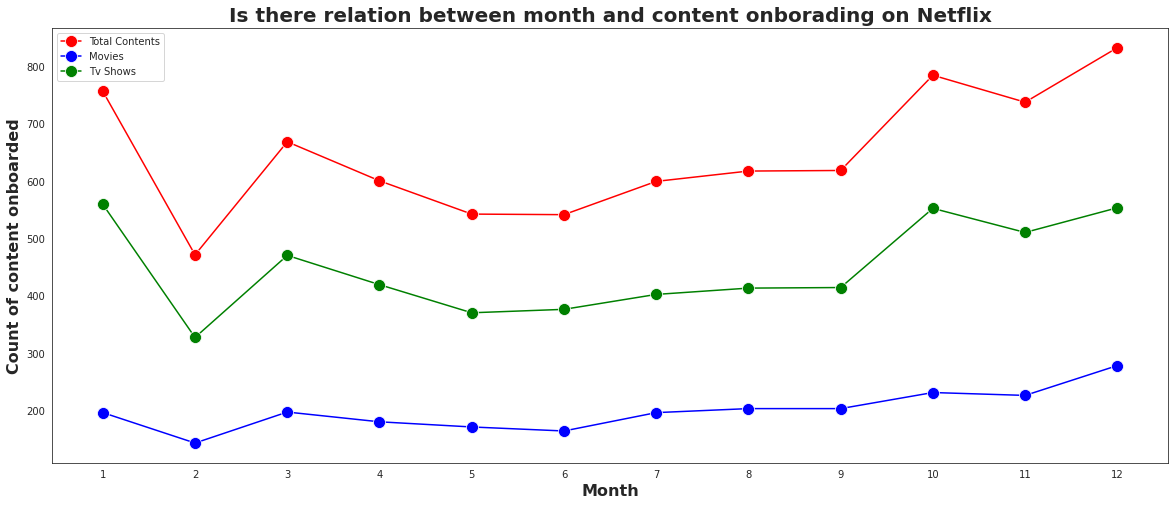

In [ ]:
#Is there relation between month and content onborading on Netflix
sns.set_style("white")
plt.figure(figsize=(20,8))
data1 = netflix_df.groupby(['month_added'])['show_id'].count().reset_index(name='total_count')
data2= netflix_df[netflix_df['type']=='TV Show']
data2= data2.groupby('month_added')['show_id'].count().reset_index(name='TV_count')
data3= netflix_df[netflix_df['type']=='Movie']
data3= data3.groupby('month_added')['show_id'].count().reset_index(name='Movie_count')
 
plot1= sns.lineplot(x=data1['month_added'],y=data1['total_count'],data=data1, color= 'Red', marker= 'o', markersize= 12)
plot2= sns.lineplot(x=data2['month_added'], y=data2['TV_count'], data=data2, color= 'Blue', marker= 'o', markersize= 12)
plot3= sns.lineplot(x=data3['month_added'], y=data3['Movie_count'], data=data3, color= 'Green', marker= 'o', markersize= 12)

plt.xlabel('Month', weight='bold', fontsize=16)
plt.ylabel('Count of content onboarded', weight='bold', fontsize=16)
plt.title("Is there relation between month and content onborading on Netflix", weight='bold', fontsize=20)
plt.xticks(data1['month_added'].unique())
#plt.xticks(rotation='vertical')
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.show()

There is least volume of content onboarded in the month of February and January, October, November and December have shown higher volumes of content onboarding.

In [ ]:
#Getting Movies and TV show records in seperate dataframes
movies_df= netflix_df[netflix_df['type']=='Movie']
tvshow_df= netflix_df[netflix_df['type']=='TV Show']

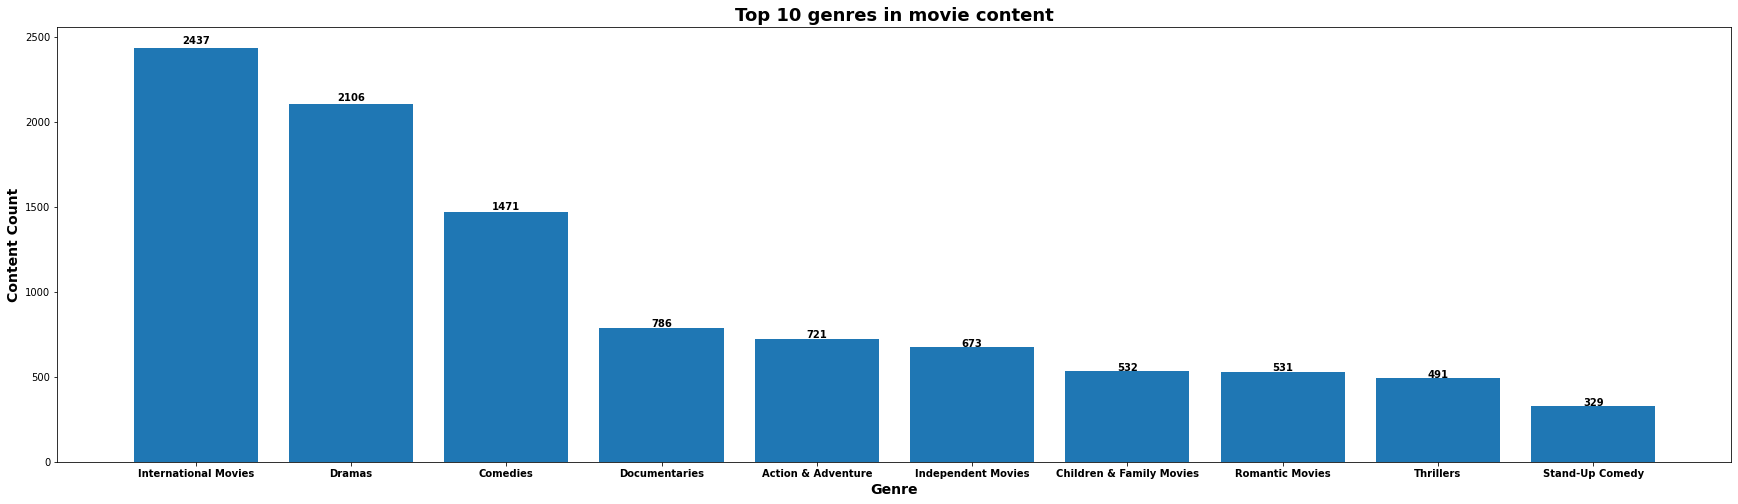

In [ ]:
#Top 10 genres in movie content
movie_genre_dict= {' ':0}
movie_genre_list= list(movies_df['listed_in'])
import pdb

for item in movie_genre_list:
  #pdb.set_trace()
  flag= 3
  item= item.split(', ')
  for i in item:
    if i in movie_genre_dict.keys():
      movie_genre_dict[i]= movie_genre_dict[i]+1
    else:
      movie_genre_dict[i]= 1
movie_genre_df= pd.DataFrame(movie_genre_dict.items(), columns=['Genre', 'Count'])
data= movie_genre_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(30,8))
graph = plt.bar(data['Genre'], data['Count'])

plt.title('Top 10 genres in movie content', weight='bold', fontsize= 18)
plt.xlabel('Genre', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['Genre'], weight='bold')
labels= []
for item in data['Count']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

In movie content International Movies, Dramas and Comedies are top 3 genres.

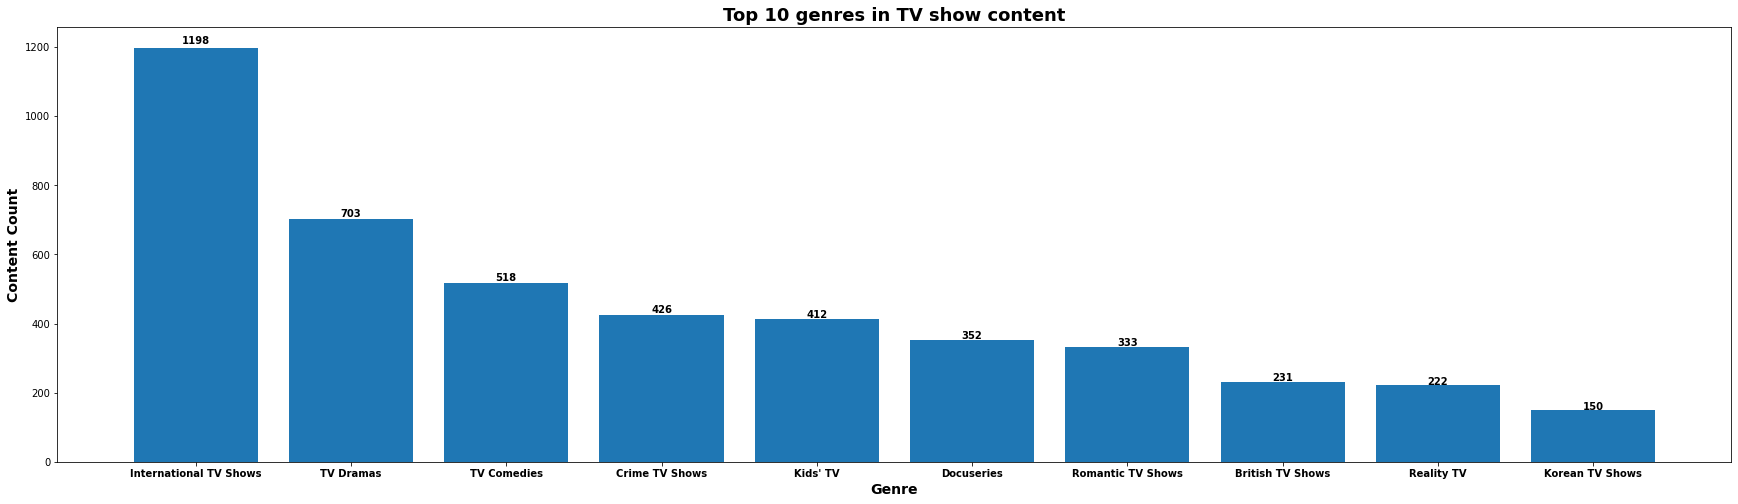

In [ ]:
#Top 10 genres in TV shows content
tvshow_genre_dict= {' ':0}
tvshow_genre_list= list(tvshow_df['listed_in'])
import pdb

for item in tvshow_genre_list:
  #pdb.set_trace()
  flag= 3
  item= item.split(', ')
  for i in item:
    if i in tvshow_genre_dict.keys():
      tvshow_genre_dict[i]= tvshow_genre_dict[i]+1
    else:
      tvshow_genre_dict[i]= 1
tvshow_genre_df= pd.DataFrame(tvshow_genre_dict.items(), columns=['Genre', 'Count'])
data= tvshow_genre_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(30,8))
graph = plt.bar(data['Genre'], data['Count'])

plt.title('Top 10 genres in TV show content', weight='bold', fontsize= 18)
plt.xlabel('Genre', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['Genre'], weight='bold')
labels= []
for item in data['Count']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

Top 3 genres in TV show content are International TV Shows, TV Dramas and TV Comedies.

Text(0.5, 1.0, 'Boxplot for duration of movie')

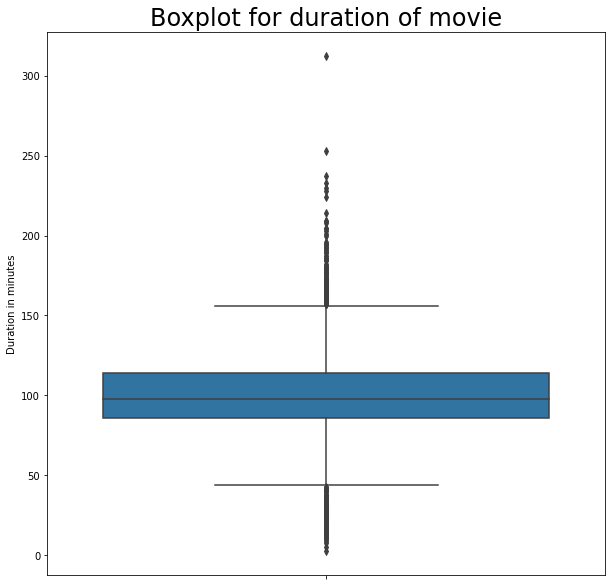

In [ ]:
#Boxplot for duration of movie
#getting duration of all movies
#duration= movies_df['duration'].to_string().partition(' ')[0]
duration['Duration in minutes']= movies_df.apply(lambda x: (x['duration'].partition(' ')[0]), axis=1)
duration['Duration in minutes']= duration['Duration in minutes'].astype('float64')
#duration.head(1)

fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(y='Duration in minutes',data=duration)
ax.set_title( "Boxplot for duration of movie" , size = 24)


There are multiple outliers and mean duration of movies is around 90 minutes.

## **Clustering**

**Data Prepocessing**

In [192]:
#cluster_df will be used for clustering
cluster_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix Movies and TV Shows Clustering- Harshavardhan Shete/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', encoding='unicode_escape')

In [168]:
cluster_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [193]:
#Replaing missing values in 'director' column with value 'unknown'
cluster_df['director'].replace(np.nan, "unknown",inplace  = True)

#Replaing missing values in 'cast' column with value 'unknown'
cluster_df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replaing missing values in 'country' column with mode
cluster_df['country']= cluster_df['country'].fillna(cluster_df['country'].mode()[0])


#Replaing missing values in 'rating' column with value most frequent rating i.e. mode
cluster_df['rating'] = cluster_df['rating'].fillna(cluster_df['rating'].mode()[0])

In [170]:
#Getting unique values from director, cast, country, rating and listed_in column
unique_directors = cluster_df['director'].explode().unique()
unique_cast = cluster_df['cast'].explode().unique()
unique_countries = cluster_df['country'].explode().unique()
unique_ratings = cluster_df['rating'].unique()
unique_genres = cluster_df['listed_in'].explode().unique()

print('Number of unique values in director column: '+ str(len(unique_directors)))
print('Number of unique values in cast column: '+ str(len(unique_cast)))
print('Number of unique values in country column: '+ str(len(unique_countries)))
print('Number of unique values in rating column: '+ str(len(unique_ratings)))
print('Number of unique values in listed_in column: '+ str(len(unique_genres)))

Number of unique values in director column: 4050
Number of unique values in cast column: 6832
Number of unique values in country column: 681
Number of unique values in rating column: 14
Number of unique values in listed_in column: 492


The director and cast column have huge number of unique values which means these columns are catering to the differences between the records and thus, won't be much of use for clustering.

In [171]:
cluster_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [172]:
type(cluster_df['listed_in'])

pandas.core.series.Series

In [194]:
#Converting string into list so that MultiLabelBinarizer can be used
cluster_df['listed_in']= cluster_df.apply(lambda x: x['listed_in'].split(', '), axis=1)

In [174]:
cluster_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...


In [195]:
#Uning MultiLabelBinarizer for 'listed_in' column to generate separate columns for each genre
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(mlb.fit_transform(cluster_df['listed_in']),columns=mlb.classes_)

In [176]:
genre_df.head(1)

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [196]:
#Merging original dataframe with the dataframe got after using MultiLabelBinarizer
cluster_df= pd.concat([cluster_df, genre_df], axis=1)

In [178]:
cluster_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [179]:
cluster_df.shape

(7787, 54)

In [180]:
cluster_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 

In [197]:
#One hot coding
cluster_df= pd.get_dummies(cluster_df, columns=['rating'], prefix=['Rating'])

In [182]:
cluster_df.shape

(7787, 67)

In [183]:
cluster_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,International TV Shows,Kids' TV,Korean TV Shows,LGBTQ Movies,Movies,Music & Musicals,Reality TV,Romantic Movies,Romantic TV Shows,Sci-Fi & Fantasy,Science & Nature TV,Spanish-Language TV Shows,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,Rating_G,Rating_NC-17,Rating_NR,Rating_PG,Rating_PG-13,Rating_R,Rating_TV-14,Rating_TV-G,Rating_TV-MA,Rating_TV-PG,Rating_TV-Y,Rating_TV-Y7,Rating_TV-Y7-FV,Rating_UR
0,s1,TV Show,3%,unknown,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [66]:
# Installing the category encoder
!pip install category_encoders

     |████████████████████████████████| 80 kB 5.4 MB/s 


In [198]:
#Using Category Encoder for cast and director column
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast and country columns
count_encoded = count_enc.fit_transform(cluster_df[['country']])

In [199]:
count_encoded.head(1)

,country
0,72


In [200]:
count_encoded.add_suffix('_Count')

,country_Count
0,72
1,100
2,23
3,3062
4,3062
...,...
7782,1
7783,923
7784,3062
7785,83


In [201]:
cluster_df= pd.concat([cluster_df, count_encoded], axis=1)

In [202]:
cluster_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description',
       'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers

In [203]:
cluster_df.shape

(7787, 68)

In [204]:
#Dropping non-numeric and irrelevant columns which will not be useful for clustering
cluster_df= cluster_df.drop(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year','duration', 'listed_in', 'description'], axis=1)

In [205]:
cluster_df.shape

(7787, 56)

 **What is the optimal value of k**

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=60, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=70, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=80, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=90, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'Values of K')

Text(0, 0.5, 'Silhouette score')

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

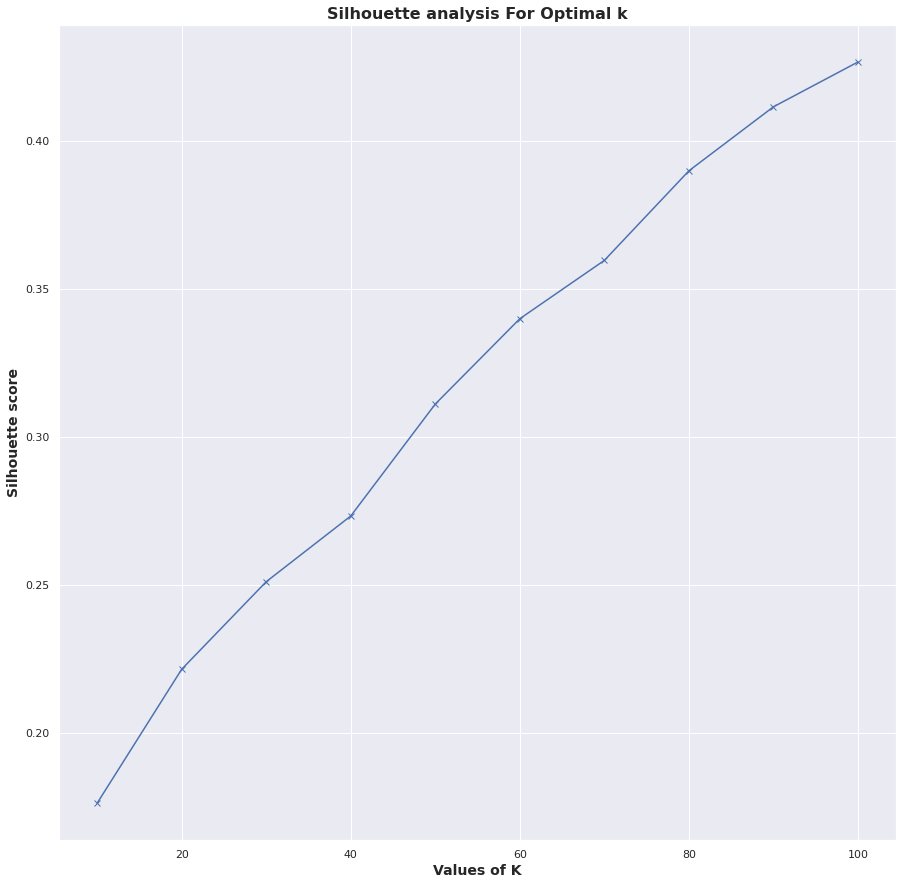

In [206]:
# Silhouette scores for different values of k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters =[10,20,30,40,50,60,70,80,90,100]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 kmeans.fit(cluster_df)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(cluster_df, cluster_labels))
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K', weight='bold', fontsize= 14) 
plt.ylabel('Silhouette score', weight='bold', fontsize= 14) 
plt.title('Silhouette analysis For Optimal k', weight='bold', fontsize= 16)
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=60, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=70, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=80, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=90, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'Values of K')

Text(0, 0.5, 'Sum of squared distances/Inertia')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

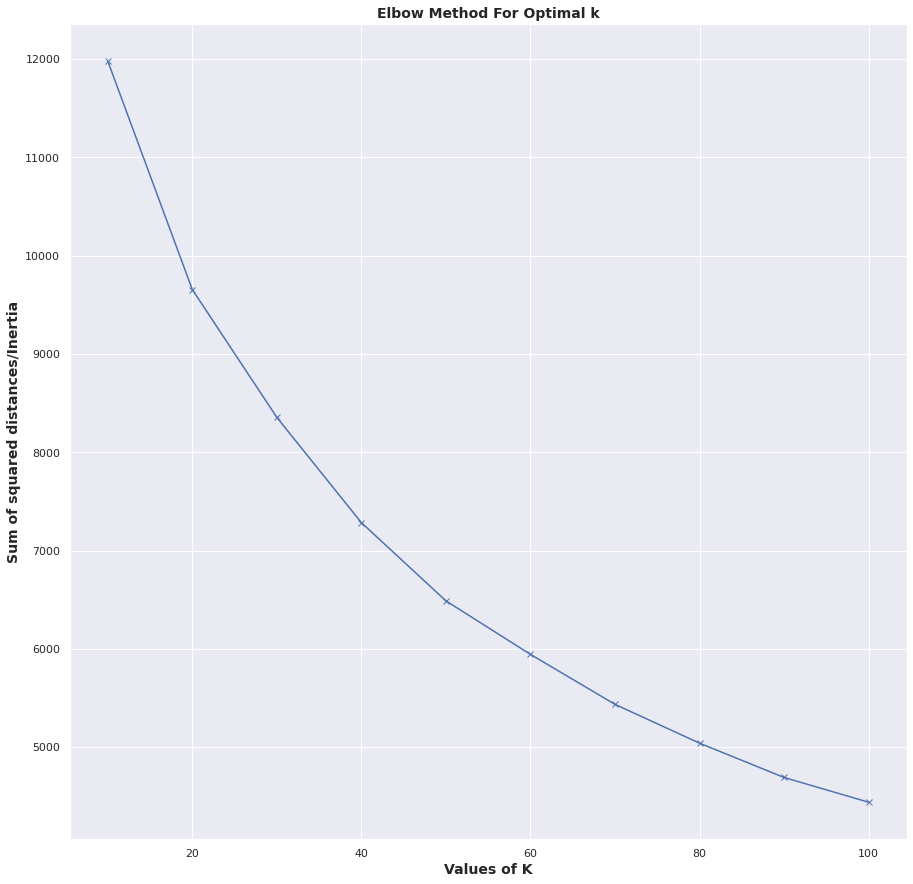

In [207]:
# Applying Elbow Method For Optimal k
Sum_of_squared_distances = []
K =[10,20,30,40,50,60,70,80,90,100]
for num_clusters in K :
 kmeans =  KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 kmeans.fit(cluster_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K', weight='bold', fontsize= 14) 
plt.ylabel('Sum of squared distances/Inertia', weight='bold', fontsize= 14) 
plt.title('Elbow Method For Optimal k', weight='bold', fontsize= 14)
plt.show()

In [208]:
# Applying the model
from sklearn.cluster import KMeans

# Create K-Means Model
modelkmeans = KMeans(n_clusters=20, init='k-means++', n_init=10).fit(cluster_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(cluster_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
#netflix_df.insert(len(netflix_df.columns), column = 'cluster', value = predictions_df.cluster)

In [141]:
netflix_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4


In [209]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(cluster_df)

x_embedded.shape

(7787, 2)

Text(0.5, 1.0, 'Netflix Movies and Tv Shows, Clustered')

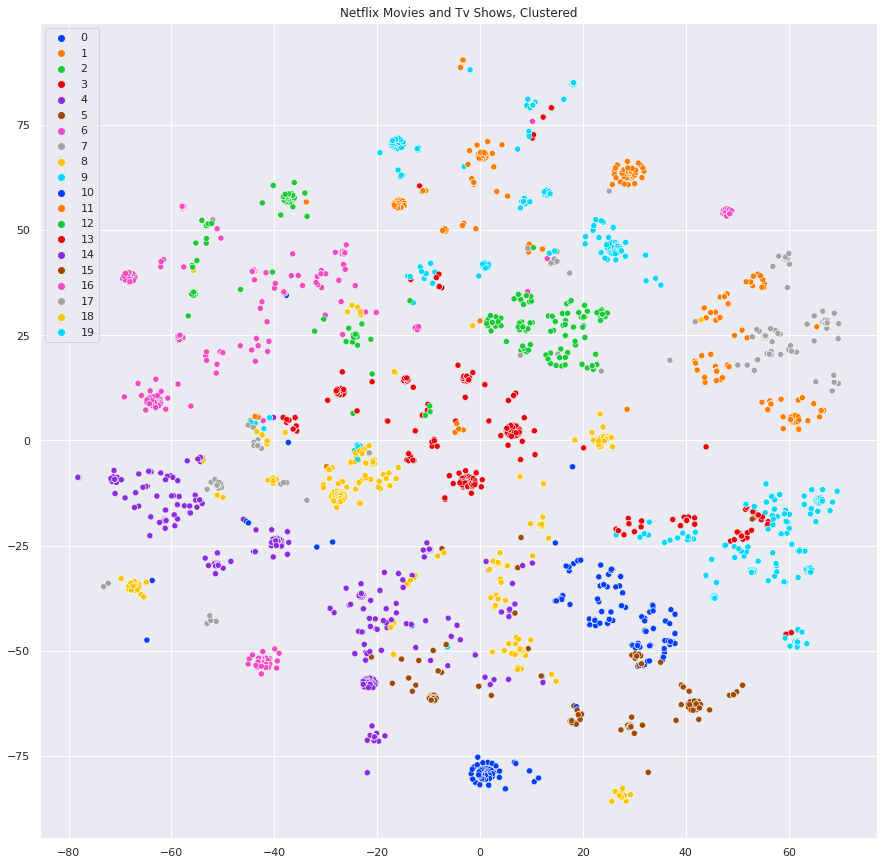

In [210]:
# Ploting the Clusters
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(predictions)))

# plot
sns.scatterplot(x_embedded[:,0], x_embedded[:,1], hue=predictions, legend='full', palette=palette)
plt.title("Netflix Movies and Tv Shows, Clustered")

plt.show()

